In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [14]:
data=pd.read_csv('./Downloads/CrimesOnWomenData.csv')
print(data.head())

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [16]:
X=data.drop(['State'],axis=1)

In [17]:
print(X.head())

   Unnamed: 0  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0  2001   871   765  420  3544  2271  5791   7
1           1  2001    33    55    0    78     3    11   0
2           2  2001   817  1070   59   850     4  1248   0
3           3  2001   888   518  859   562    21  1558  83
4           4  2001   959   171   70  1763   161   840   0


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

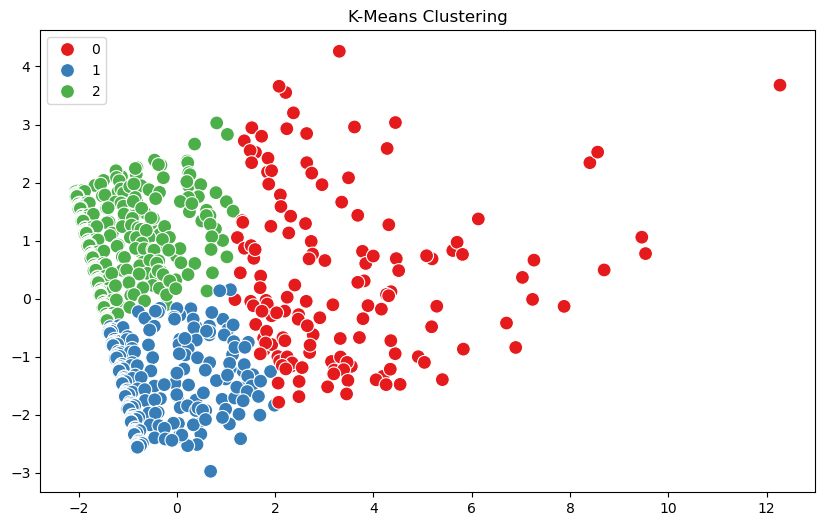

In [22]:
X['Cluster'] = kmeans.labels_


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans.labels_, palette='Set1', s=100)
plt.title('K-Means Clustering')
plt.show()

linked = linkage(data_scaled, method='ward')